In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json
from pathlib import Path

In [2]:
PATCHES_DIR = "../data/processed/patches"
ANNOTATIONS_FILE = "../data/annotations/labels.json"

In [3]:
os.makedirs(os.path.dirname(ANNOTATIONS_FILE), exist_ok=True)

# Load all patches
patch_files = sorted([f for f in os.listdir(PATCHES_DIR) if f.endswith('.npy')])
print(f"Found {len(patch_files)} patches to annotate")

Found 16 patches to annotate


In [6]:
if os.path.exists(ANNOTATIONS_FILE):
    with open(ANNOTATIONS_FILE, 'r') as f:
        annotations = json.load(f)
else:
    annotations = {}

print(f"Already annotated: {len(annotations)} patches")

def visualize_patch(patch_path, annotation=None):
    """Visualize a single patch with its annotation"""
    patch_data = np.load(patch_path)
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    # RGB (Bands 3,2,1)
    rgb = np.stack([patch_data[3], patch_data[2], patch_data[1]], axis=-1)
    rgb = np.clip(rgb * 3, 0, 1)  # Enhance brightness
    axes[0,0].imshow(rgb)
    axes[0,0].set_title('RGB Composite')
    axes[0,0].axis('off')
    
    # NDWI
    axes[0,1].imshow(patch_data[4], cmap='RdYlBu', vmin=-1, vmax=1)
    axes[0,1].set_title('NDWI (Water Index)')
    axes[0,1].axis('off')
    
    # MNDWI
    axes[0,2].imshow(patch_data[5], cmap='RdYlBu', vmin=-1, vmax=1)
    axes[0,2].set_title('MNDWI (Modified Water Index)')
    axes[0,2].axis('off')
    
    # Individual bands
    bands = ['Red (B4)', 'Green (B3)', 'Blue (B2)']
    for i, (band, ax) in enumerate(zip(bands, axes[1,:])):
        ax.imshow(patch_data[i], cmap='gray')
        ax.set_title(band)
        ax.axis('off')
    
    plt.suptitle(f"Patch: {os.path.basename(patch_path)}\nAnnotation: {annotation}", fontsize=14)
    plt.tight_layout()
    plt.show()


Already annotated: 0 patches


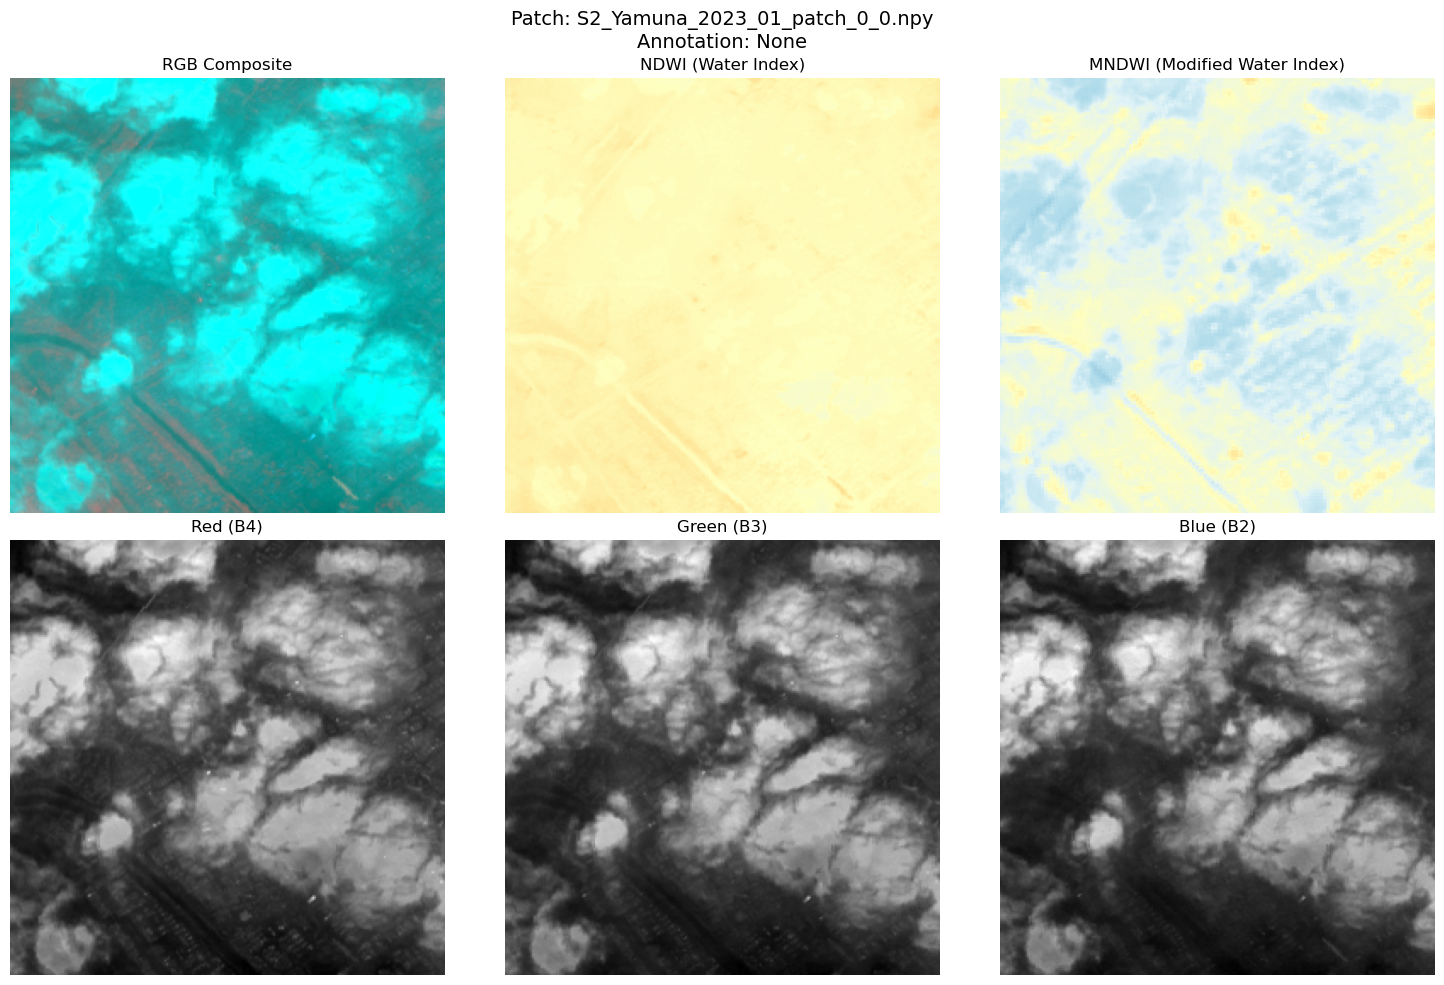


Patch 1/16 - S2_Yamuna_2023_01_patch_0_0.npy
Options: 1=Mining, 0=No Mining, s=Skip, q=Quit


KeyboardInterrupt: Interrupted by user

In [7]:
def annotate_patches():
    """Interactive annotation loop"""
    annotated_count = len(annotations)
    
    for i, patch_file in enumerate(patch_files):
        patch_path = os.path.join(PATCHES_DIR, patch_file)
        
        # Skip if already annotated
        if patch_file in annotations:
            continue
            
        # Visualize
        visualize_patch(patch_path)
        
        # Get user input
        print(f"\nPatch {i+1}/{len(patch_files)} - {patch_file}")
        print("Options: 1=Mining, 0=No Mining, s=Skip, q=Quit")
        user_input = input("Enter your annotation: ").strip().lower()
        
        if user_input == '1':
            annotations[patch_file] = 1
            print("✅ Labeled as MINING")
        elif user_input == '0':
            annotations[patch_file] = 0  
            print("✅ Labeled as NO MINING")
        elif user_input == 's':
            print("⏭️ Skipped")
            continue
        elif user_input == 'q':
            print("💾 Saving and quitting...")
            break
        else:
            print("❌ Invalid input, skipping")
            continue
        
        # Save progress every 10 annotations
        annotated_count += 1
        if annotated_count % 10 == 0:
            with open(ANNOTATIONS_FILE, 'w') as f:
                json.dump(annotations, f, indent=2)
            print(f"💾 Progress saved! {annotated_count} patches annotated")
    
    # Final save
    with open(ANNOTATIONS_FILE, 'w') as f:
        json.dump(annotations, f, indent=2)
    print(f"🎉 Annotation complete! Total: {len(annotations)} patches")

# Start annotation
annotate_patches()